In [9]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

nft_df = pd.read_csv('/Users/dannygoler/Dropbox/My Mac (Dannys-MacBook-Pro-2.local)/Desktop/Coding/2021/Data Science/CSVs/Capstone 2 Dataset/Data_API.csv')
nft_df_2 = res_rev_pred_df.copy()

In [11]:
nft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071027 entries, 0 to 6071026
Data columns (total 24 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Smart_contract            object 
 1   ID_token                  object 
 2   Transaction_hash          object 
 3   Seller_address            object 
 4   Seller_username           object 
 5   Buyer_address             object 
 6   Buyer_username            object 
 7   Image_url_1               object 
 8   Image_url_2               object 
 9   Image_url_3               object 
 10  Image_url_4               object 
 11  Price_Crypto              float64
 12  Crypto                    object 
 13  Price_USD                 float64
 14  Name                      object 
 15  Description               object 
 16  Collection                object 
 17  Market                    object 
 18  Datetime_updated          object 
 19  Datetime_updated_seconds  object 
 20  Permanent_link          

In [13]:
nft_df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games
5,NaN,43107083.0,0x986ecc59dc28e84ad987a52e4a4fdade67d1fbb5f81b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=116&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '43107083.0')",Godsunchained,Games
6,NaN,7713824.0,0x72c1bfec2a020b5cb55ee3fc2f8ae1e66568ec881f62...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=190&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '7713824.0')",Godsunchained,Games
7,NaN,45951791.0,0x34baab28115bdadbcbc50846220060bb8e516f754c3b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=173&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '45951791.0')",Godsunchained,Games
8,NaN,5400581.0,0xf52ba58317f3ab62fb43da3e9d417fe4fa88bff86d9c...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c5968ee5ce21ad7324c97014fcb99f87f7fec6f,NaN,https://card.godsunchained.com/?id=27&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:28,NaN,"('Godsunchained', '5400581.0')",Godsunchained,Games
9,NaN,117891743.0,0xb70b159f02200125a258726694299931a8c69651053d...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:57:50,NaN,"('Godsunchained', '117891743.0')",Godsunchained,Games


In [14]:
# Let's create a new data set without the Nans:
# nft_cleaned_df = nft_df.dropna()
# nft_df.dropna(inplace=True)
# nft_cleaned_df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
4163811,0x06012c8cf97bead5deae237070f9587f8e7a266d,461189,0x127fdfbf5d72c8645539d1f3ea207540ef580712719d...,0xd68c2b3086f9d0e278b0e0aea23ed361fa7c28e1,0xd68c2b3086,0x3f537764f0b09436d1794fecb8713d5fcb8f182f,treetop,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,...,Phuz 3/4,*waves*! I'm Phuz 3/4. I enjoy licking doorkno...,Cryptokitties,OpenSea,2018-02-28 00:00:00,2018-02-28 23:04:39,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '461189')",Cryptokittie,Art
4163828,0x06012c8cf97bead5deae237070f9587f8e7a266d,419180,0x2fed0f71679211da1fcb287e37f2cec51e631cd62e53...,0x062d6d315e6c8aa196b9072d749e3f3f3579fdd0,willaby2,0x7c22564ed22d398192bf38008228d64eb72765db,Original-CW,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,...,OG CW Serpent 🐍 (51/153),*waves*! I'm OG CW Serpent 🐍 (51/153). I want ...,Cryptokitties,OpenSea,2018-02-28 00:00:00,2018-02-28 22:07:27,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '419180')",Cryptokittie,Art
4163836,0x06012c8cf97bead5deae237070f9587f8e7a266d,510542,0x2c242e41da6a16dd77c046a5cceaf9a0e1a1a4f694c2...,0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459,Pranksy,0x7c22564ed22d398192bf38008228d64eb72765db,Original-CW,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,...,2/5 Onyx Wolfgrey,Bonjour! I'm 2/5 Onyx Wolfgrey. I used to do b...,Cryptokitties,OpenSea,2018-02-28 00:00:00,2018-02-28 21:58:38,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '510542')",Cryptokittie,Art
4163839,0x06012c8cf97bead5deae237070f9587f8e7a266d,568768,0x742bb13b3e16fcc80efbc2ead57ec53234448bfc736c...,0x4886404ecfb86b759b27867afb0f64172eea1c53,PsyDuck,0x549022ad5cd11816eb7ce6ea15ae61c1fb4edb8a,NFTpain,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,...,---h ---f --5- ---f,Aloha. ---h ---f --5- ---f here. I'm here to e...,Cryptokitties,OpenSea,2018-02-28 00:00:00,2018-02-28 21:49:29,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '568768')",Cryptokittie,Art
4163890,0x06012c8cf97bead5deae237070f9587f8e7a266d,518318,0x43d34dd51195b977048bda0f78d85f7c31cd219692d4...,0xca97a04e562a71d6fc95f335cb6adc5e07e2e8d8,Bjkitty22,0xf8e2867d1ac32f02f2e42ee0f1602e34d6bc3187,Countsnackula,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,...,Sass Dom & R1 Jambo,Jambo. My name's Sass Dom & R1 Jambo. I once c...,Cryptokitties,OpenSea,2018-02-28 00:00:00,2018-02-28 20:55:41,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '518318')",Cryptokittie,Art
4163912,0x06012c8cf97bead5deae237070f9587f8e7a266d,479803,0xe6ce8834b47c9f275d5094bd49df5188e1836d41f270...,0x062d6d315e6c8aa196b9072d749e3f3f3579fdd0,willaby2,0xb87e73ad25086c43a16fe5f9589ff265f8a3a9eb,Heca,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,...,Cerulian Thunder,Greetings! I'm Cerulian Thunder. I used to do ...,Cryptokitties,OpenSea,2018-02-28 00:00:00,2018-02-28 20:34:40,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '479803')",Cryptokittie,Art
4163939,0x06012c8cf97bead5deae237070f9587f8e7a266d,561674,0x24437e5a6e423ab03cdbcfa633a29830546e34a4d54d...,0x7045540552d1fcc2ab1eb64e1f868aeb490606fa

In [15]:
nft_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506739 entries, 4163811 to 6071019
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Smart_contract            506739 non-null  object 
 1   ID_token                  506739 non-null  object 
 2   Transaction_hash          506739 non-null  object 
 3   Seller_address            506739 non-null  object 
 4   Seller_username           506739 non-null  object 
 5   Buyer_address             506739 non-null  object 
 6   Buyer_username            506739 non-null  object 
 7   Image_url_1               506739 non-null  object 
 8   Image_url_2               506739 non-null  object 
 9   Image_url_3               506739 non-null  object 
 10  Image_url_4               506739 non-null  object 
 11  Price_Crypto              506739 non-null  float64
 12  Crypto                    506739 non-null  object 
 13  Price_USD                 506739 non-

In [17]:
nft_cleaned_df = nft_cleaned_df.drop(['Smart_contract', 'Transaction_hash', 'Seller_address',
                                                     'Buyer_address', 'Image_url_2', 'Image_url_3', 'Image_url_4', 'Datetime_updated',
                                                    'Permanent_link'], 1)

In [18]:
nft_cleaned_df.head()

,ID_token,Seller_username,Buyer_username,Image_url_1,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated_seconds,Unique_id_collection,Collection_cleaned,Category
4163811,461189,0xd68c2b3086,treetop,https://storage.opensea.io/0x06012c8cf97bead5d...,0.009000,ETH,7.630065,Phuz 3/4,*waves*! I'm Phuz 3/4. I enjoy licking doorkno...,Cryptokitties,OpenSea,2018-02-28 23:04:39,"('Cryptokitties', '461189')",Cryptokittie,Art
4163828,419180,willaby2,Original-CW,https://storage.opensea.io/0x06012c8cf97bead5d...,0.050000,ETH,42.389250,OG CW Serpent 🐍 (51/153),*waves*! I'm OG CW Serpent 🐍 (51/153). I want ...,Cryptokitties,OpenSea,2018-02-28 22:07:27,"('Cryptokitties', '419180')",Cryptokittie,Art
4163836,510542,Pranksy,Original-CW,https://storage.opensea.io/0x06012c8cf97bead5d...,0.005000,ETH,4.238925,2/5 Onyx Wolfgrey,Bonjour! I'm 2/5 Onyx Wolfgrey. I used to do b...,Cryptokitties,OpenSea,2018-02-28 21:58:38,"('Cryptokitties', '510542')",Cryptokittie,Art
4163839,568768,PsyDuck,NFTpain,https://storage.opensea.io/0x06012c8cf97bead5d...,0.068783,ETH,58.313478,---h ---f --5- ---f,Aloha. ---h ---f --5- ---f here. I'm here to e...,Cryptokitties,OpenSea,2018-02-28 21:49:29,"('Cryptokitties', '568768')",Cryptokittie,Art
4163890,518318,Bjkitty22,Countsnackula,https://storage.opensea.io/0x06012c8cf97bead5d...,0.007000,ETH,5.934495,Sass Dom & R1 Jambo,Jambo. My name's Sass Dom & R1 Jambo. I once c...,Cryptokitties,OpenSea,2018-02-28 20:55:41,"('Cryptokitties', '518318')",Cryptokittie,Art


In [25]:
nft_cleaned_df.Category.unique()

array(['Art', 'Collectible', 'Metaverse', 'Games', 'Other', 'Utility'],
      dtype=object)

In [30]:
nft_cleaned_df.Market.unique()

array(['OpenSea'], dtype=object)

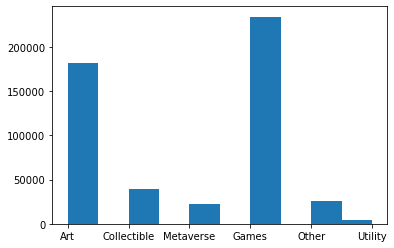

In [28]:
# Further data exploration:
plt.hist(nft_cleaned_df.Category)
plt.show()

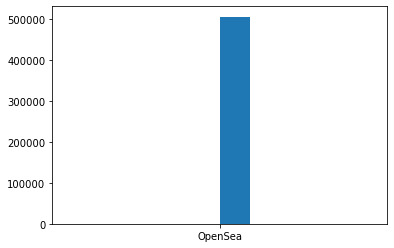

In [29]:
plt.hist(nft_cleaned_df.Market)
plt.show()

In [53]:
nft_cleaned_df_2 = nft_df_2.drop(['Smart_contract', 'Transaction_hash', 'Seller_address',
                                                     'Buyer_address', 'Image_url_2', 'Image_url_3', 'Image_url_4', 'Datetime_updated',
                                                    'Permanent_link', 'Collection'], 1)

In [55]:
nft_cleaned_df_2.head()

,ID_token,Seller_username,Buyer_username,Image_url_1,Price_Crypto,Crypto,Price_USD,Name,Description,Market,Datetime_updated_seconds,Unique_id_collection,Collection_cleaned,Category
0,87094722.0,NaN,NaN,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,NaN,NaN,Godsunchained,2019-11-30 23:59:33,"('Godsunchained', '87094722.0')",Godsunchained,Games
1,73044643.0,NaN,NaN,https://card.godsunchained.com/?id=79&q=4,0.0013,ETH,0.197067,NaN,NaN,Godsunchained,2019-11-30 23:59:33,"('Godsunchained', '73044643.0')",Godsunchained,Games
2,17107482.0,NaN,NaN,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,NaN,NaN,Godsunchained,2019-11-30 23:59:33,"('Godsunchained', '17107482.0')",Godsunchained,Games
3,82230857.0,NaN,NaN,https://card.godsunchained.com/?id=227&q=4,0.0022,ETH,0.333498,NaN,NaN,Godsunchained,2019-11-30 23:59:33,"('Godsunchained', '82230857.0')",Godsunchained,Games
4,40925443.0,NaN,NaN,https://card.godsunchained.com/?id=62&q=4,0.0012,ETH,0.181908,NaN,NaN,Godsunchained,2019-11-30 23:58:44,"('Godsunchained', '40925443.0')",Godsunchained,Games


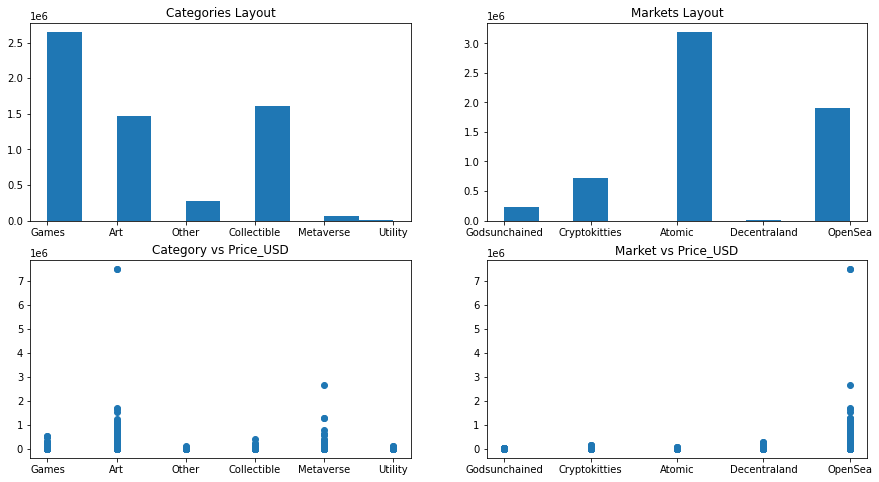

In [75]:
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
plt.hist(nft_cleaned_df_2.Category)
plt.title('Categories Layout')

plt.subplot(2, 2, 2)
plt.hist(nft_cleaned_df_2.Market)
plt.title('Markets Layout')

plt.subplot(2,2,3)
plt.scatter(nft_cleaned_df_2['Category'], nft_cleaned_df_2['Price_USD'])
plt.title("Category vs Price_USD")

plt.subplot(2,2,4)
plt.scatter(nft_cleaned_df_2['Market'], nft_cleaned_df_2['Price_USD'])
plt.title("Market vs Price_USD")

plt.show()

In [78]:
# Let's create dummies for "Category" and "Market" 
# and add them as columns into the nft_cleaned_df_2 dataset:
nft_cleaned_df_3 = nft_cleaned_df_2.copy()
nft_cleaned_df_2 = pd.concat([nft_cleaned_df_2, pd.get_dummies(nft_cleaned_df_2.Category, prefix="Category", drop_first=True)], axis=1)
nft_cleaned_df_2 = pd.concat([nft_cleaned_df_2, pd.get_dummies(nft_cleaned_df_2.Market, prefix="Market", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(nft_cleaned_df_2.Category, prefix="Category", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(nft_cleaned_df_2.Market, prefix="Market", drop_first=True).columns)

In [79]:
nft_cleaned_df_2.head()

,ID_token,Seller_username,Buyer_username,Image_url_1,Price_Crypto,Crypto,Price_USD,Name,Description,Market,...,Category,Category_Collectible,Category_Games,Category_Metaverse,Category_Other,Category_Utility,Market_Cryptokitties,Market_Decentraland,Market_Godsunchained,Market_OpenSea
0,87094722.0,NaN,NaN,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,NaN,NaN,Godsunchained,...,Games,0,1,0,0,0,0,0,1,0
1,73044643.0,NaN,NaN,https://card.godsunchained.com/?id=79&q=4,0.0013,ETH,0.197067,NaN,NaN,Godsunchained,...,Games,0,1,0,0,0,0,0,1,0
2,17107482.0,NaN,NaN,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,NaN,NaN,Godsunchained,...,Games,0,1,0,0,0,0,0,1,0
3,82230857.0,NaN,NaN,https://card.godsunchained.com/?id=227&q=4,0.0022,ETH,0.333498,NaN,NaN,Godsunchained,...,Games,0,1,0,0,0,0,0,1,0
4,40925443.0,NaN,NaN,https://card.godsunchained.com/?id=62&q=4,0.0012,ETH,0.181908,NaN,NaN,Godsunchained,...,Games,0,1,0,0,0,0,0,1,0


In [81]:
dummy_column_names

['Category_Collectible',
 'Category_Games',
 'Category_Metaverse',
 'Category_Other',
 'Category_Utility',
 'Market_Cryptokitties',
 'Market_Decentraland',
 'Market_Godsunchained',
 'Market_OpenSea']

In [102]:
nft_cleaned_df_2.dropna(subset=['Price_USD'], inplace=True)

In [103]:
total_missing = nft_cleaned_df_2.isnull().sum().sort_values(ascending=False)
percent_missing = (nft_cleaned_df_2.isnull().sum()/nft_cleaned_df_2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

# nft_cleaned_df_2['number_of_nan_in_Price_USD'] = nft_cleaned_df_2['Price_USD'].sum(nft_cleaned_df_2['Price_USD']!=dtypes(float64))

,Total,Percent
Buyer_username,5176346,0.853796
Seller_username,4976517,0.820836
Description,4339435,0.715754
Name,4218572,0.695819
Image_url_1,54798,0.009038
ID_token,0,0.000000
Category_Collectible,0,0.000000
Market_Godsunchained,0,0.000000
Market_Decentraland,0,0.000000
Market_Cryptokitties,0,0.000000


In [104]:
import statsmodels.api as sm

# "Y" is the target veriable:
Y = nft_cleaned_df_2['Price_USD']

# "X" is the feature set:
X = nft_cleaned_df_2[dummy_column_names]

# Adding a constant to the model:
X = sm.add_constant(X)

# Fit an OLS model using statsmodels:
results = sm.OLS(Y, X).fit()

# Print the summery results:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1677.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:51:11   Log-Likelihood:            -6.0798e+07
No. Observations:             6062744   AIC:                         1.216e+08
Df Residuals:                 6062734   BIC:                         1.216e+08
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  590.8656 

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 4850195
The number of observations in test set is 1212549


In [107]:
X_train = sm.add_constant(X_train)

# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3317.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:25:46   Log-Likelihood:            -4.6364e+07
No. Observations:             4850195   AIC:                         9.273e+07
Df Residuals:                 4850185   BIC:                         9.273e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  576.4658 

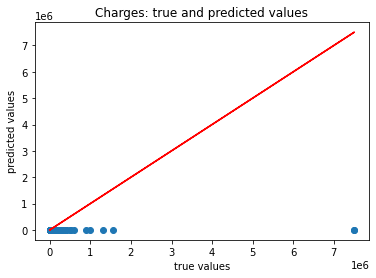

Mean absolute error of the prediction is: 254.1278310529457
Mean squared error of the prediction is: 103184182.99549931
Root mean squared error of the prediction is: 10157.96155709891
Mean absolute percentage error of the prediction is: 89369674754393.66


In [108]:
# Add a constant to the model because it's best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# You are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
plt.figure(figsize=(30,50))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(houseprices_df_2.groupby(column)["saleprice"].mean().index, houseprices_df_2.groupby(column)["saleprice"].mean(),
           color=("grey","green"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [109]:
# "Y" is the target veriable:
Y = nft_cleaned_df_2['Price_USD']

# "X" is the feature set:
X = nft_cleaned_df_2[dummy_column_names]

# Adding a constant to the model:
X = sm.add_constant(X)

# Fit an OLS model using statsmodels:
results = sm.OLS(Y, X).fit()

# Print the summery results:
print(results.summary())

# MANAGE OVERFITTING AND REGULARIZATION:

# `Y` is the target variable
Y = nft_cleaned_df_2['Price_USD']

numerical_cols = [col_name for col_name in nft_cleaned_df_2.dtypes[nft_cleaned_df_2.dtypes.values == 'int64'].index 
                    if col_name not in ["id", "saleprice"] ]

X = nft_cleaned_df_2[numerical_cols]

X = pd.concat([X**i for i in range(1,21)], axis=1)

# `X` is the feature set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# Fit an OLS model using scikit-learn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# You are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1677.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:29:37   Log-Likelihood:            -6.0798e+07
No. Observations:             6062744   AIC:                         1.216e+08
Df Residuals:                 6062734   BIC:                         1.216e+08
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  590.8656 

ValueError: at least one array or dtype is required